In [1]:
#下面这行代码，是为了把自己编写的代码文件当作一共模块导入，这里是把Utilities文件夹中的plotting.py文件当作python的模块导入，对应的是下面的from plotting import newfig, savefig。路径要随着不同设备的系统做相应的修改
import sys #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
# sys.path.insert(0, '../../../Utilities/') #在 Python的sys.path列表中插入一个新的路径。sys.path是一个 Python 在导入模块时会查找的路径列表。新的路径'../../Utilities/'相对于当前脚本的路径。当你尝试导入一个模块时，Python 会在 sys.path 列表中的路径下查找这个模块。通过在列表开始位置插入一个路径，你可以让 Python 优先在这个路径下查找模块。这在你需要导入自定义模块或者不在 Python 标准库中的模块时非常有用。

import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号


# from plotting_torch import newfig, savefig #从自定义的plotting_torch.py文件中导入了newfig和savefig函数。这两个函数用于创建和保存图形。这两个函数的定义在plotting_torch.py文件中

from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。

import seaborn as sns  # 导入seaborn库用于绘制密度图

from sklearn.cluster import KMeans #sklearn是一个广泛使用的机器学习库，提供了各种算法和工具用于数据挖掘和分析。Kmeans是聚类算法，用于将数据分成预先指定数量的簇
import faiss #一种高效的相似性搜索和密集向量聚类库，适用于在大规模数据中进行高维向量的搜索和聚类操作
#faiss的安装方法：conda install -c conda-forge faiss-gpu
import matplotlib.cm as cm

In [2]:
import re
import pandas as pd

# 示例数据
methods_data = {
    'PINN': """
    [0.0004918457703064434, 0.00047652681129406915, 0.0005012606555598792, 0.0003818694368099861, 0.0005477638305228858, 0.0004946283653619386, 0.0005928433148593851, 0.0009132475851966421, 0.0007739739732427034, 0.0004825569468069985]
    Error u of fuhe active learning(LHS sampling): 5.656517e-04
    [0.00015397783070231113, 0.0001454873810307916, 0.0001548726465310479, 0.00012626243115483474, 0.00019635635649588497, 0.00015449652540876614, 0.0001842174007906868, 0.0002456482515296615, 0.0002340281849460364, 0.00014943499300139977]
    MAE of fuhe active learning(LHS sampling): 1.744782e-04
    [5.02034790357667e-08, 4.692699759238895e-08, 5.196422300360493e-08, 3.6634415860281316e-08, 8.172389465962264e-08, 5.070185177060105e-08, 7.304977403304386e-08, 1.6983871256676875e-07, 1.2104198107510296e-07, 4.820312678060034e-08]
    MSE of fuhe active learning(LHS sampling): 7.302885e-08
    [0.00015304271, 0.0015350054, 8.762271e-05, 3.9917533e-05, 0.000530291, 7.579352e-05, 8.895196e-05, 0.00013733155, 0.00020986705, 0.009149307]
    Chaos of fuhe active learning(LHS sampling): 1.200713e-03
    [4.4392527e-07, 4.6064906e-07, 4.361376e-07, 4.7483502e-07, 4.446665e-07, 4.305923e-07, 4.1993644e-07, 4.9815367e-07, 4.890644e-07, 3.6887923e-07]
    Residual of fuhe active learning(LHS sampling): 4.466840e-07
    """,
    'Active': """
    [0.0005554339608559225, 0.0004906510957650293, 0.0004665685982288446, 0.0005181701206443832, 0.0019774223264008386, 0.0005061674378162917, 0.0005259810346627851, 0.3425491908078741, 0.0007248379140604068, 0.0006253204139293384]
    Error u of fuhe active learning(LHS sampling): 3.489397e-02
    [0.00018516130868928007, 0.00015239831731062625, 0.00014283152582780407, 0.00016390754795242608, 0.0005215132734166209, 0.00016036564347222663, 0.00017179250399467942, 0.07688654768698683, 0.00025618642599234404, 0.0002191694478042031]
    MAE of fuhe active learning(LHS sampling): 7.885987e-03
    [6.588629203382683e-08, 4.983859216945594e-08, 4.544956632807816e-08, 5.5827687329648876e-08, 7.772103421774413e-07, 5.354005337717293e-08, 5.871059239147882e-08, 0.02397774313168036, 1.2040161291692695e-07, 8.790442589443165e-08]
    MSE of fuhe active learning(LHS sampling): 2.397906e-03
    [0.0576123, 0.00014910809, 9.478479e-05, 7.30025e-05, 0.00012834524, 8.8688335e-05, 7.884619e-05, 3.328626e-06, 0.0059098727, 0.0034214007]
    Chaos of fuhe active learning(LHS sampling): 6.755968e-03
    [4.1639214e-07, 4.883402e-07, 4.72897e-07, 4.6490095e-07, 5.500742e-07, 4.6015225e-07, 5.2067844e-07, 9.125596e-07, 4.2798774e-07, 4.987462e-07]
    Residual of fuhe active learning(LHS sampling): 5.212729e-07
    """,
    'Residual': """
    [0.0004388316277854738, 0.0004516425036080554, 0.0004909684909272208, 0.0004499848179256069, 0.0009273143381470267, 0.0005022326877530732, 0.0004747893294826137, 0.0004907480713503563, 0.000503456846600242, 0.6412601608789799]
    Error u of fuhe active learning(LHS sampling): 6.459901e-02
    [0.00013466048655549618, 0.00013774013160500353, 0.00014855616332055393, 0.00013839193712877486, 0.00028004969048753275, 0.0001510724688482137, 0.0001452714425514351, 0.00014857218467576657, 0.0001520704178371895, 0.1582632412863403]
    MAE of fuhe active learning(LHS sampling): 1.596996e-02
    [4.0661568759470776e-08, 4.259159818610274e-08, 5.0772769573972464e-08, 4.2571266351709874e-08, 1.7989833118891455e-07, 5.204902642176019e-08, 4.7284867983491434e-08, 4.937375046094986e-08, 5.234705484498265e-08, 0.08286103053311286]
    MSE of fuhe active learning(LHS sampling): 8.286159e-03
    [0.0049398914, 0.0071390835, 0.00014965539, 4.66547, 1.098932, 0.00012691357, 8.9322144e-05, 1.7970233e-05, 0.0045942524, 15.120174]
    Chaos of fuhe active learning(LHS sampling): 2.090163e+00
    [4.784065e-07, 5.537331e-07, 4.3092746e-07, 5.106276e-07, 4.6684931e-07, 4.8295533e-07, 4.5237516e-07, 5.0499045e-07, 4.961496e-07, 1.8578302e-06]
    Residual of fuhe active learning(LHS sampling): 6.234845e-07
    """,
    '0.7Residual': """
    [0.00045923055417779895, 0.0003805195898261856, 0.00046599589898333463, 0.00046747487026509404, 0.00045403084568467524, 0.0004705600674900421, 0.0004604943863655175, 0.00046439912000889746, 0.00046725411369758375, 0.0005324882468577318]
    Error u of fuhe active learning(LHS sampling): 4.622448e-04
    [0.00014025014785666178, 0.00012330366198635658, 0.0001406931332183354, 0.00014315082258136954, 0.00013857859174272303, 0.0001420651370555427, 0.00014100246765852255, 0.00014000688516935478, 0.00014145210762449018, 0.0001625927164581426]
    MAE of fuhe active learning(LHS sampling): 1.413096e-04
    [4.423519388343329e-08, 3.28702686893946e-08, 4.540074511476649e-08, 4.558819972743756e-08, 4.2605986612842545e-08, 4.6204191755255835e-08, 4.4642112865802436e-08, 4.492584896773996e-08, 4.5614551216907014e-08, 5.905083640115016e-08]
    MSE of fuhe active learning(LHS sampling): 4.511379e-08
    [0.0083980495, 0.004980512, 0.00014981862, 0.08522135, 0.004440362, 0.00011760158, 9.8106364e-05, 4.529953e-06, 0.0039979485, 0.00010213685]
    Chaos of fuhe active learning(LHS sampling): 1.075104e-02
    [4.3858063e-07, 4.9004484e-07, 4.866275e-07, 4.77517e-07, 4.2084434e-07, 3.9956672e-07, 4.9082746e-07, 4.5736613e-07, 4.4355988e-07, 4.217593e-07]
    Residual of fuhe active learning(LHS sampling): 4.526694e-07
    """,
}

# 定义读取数据的函数
def extract_metrics(data):
    # 使用正则表达式提取数据
    error_u = re.findall(r'\[([^\]]+)\]', data)[0]
    mae = re.findall(r'\[([^\]]+)\]', data)[1]
    mse = re.findall(r'\[([^\]]+)\]', data)[2]
    chaos = re.findall(r'\[([^\]]+)\]', data)[3]
    residual = re.findall(r'\[([^\]]+)\]', data)[4]
    
    # 将字符串转换为浮点数列表
    error_u = list(map(float, error_u.split(',')))
    mae = list(map(float, mae.split(',')))
    mse = list(map(float, mse.split(',')))
    chaos = list(map(float, chaos.split(',')))
    residual = list(map(float, residual.split(',')))
    
    return error_u, mae, mse, chaos, residual

# 定义处理所有方法数据的函数
def process_methods_data(methods_data):
    data = {
        'Method': [],
        'Metric': [],
        'Values': []
    }
    
    for method, data_str in methods_data.items():
        error_u, mae, mse, chaos, residual = extract_metrics(data_str)
        
        data['Method'].append(method)
        data['Metric'].append('Error_u')
        data['Values'].append(error_u)
        
        data['Method'].append(method)
        data['Metric'].append('MAE')
        data['Values'].append(mae)
        
        data['Method'].append(method)
        data['Metric'].append('MSE')
        data['Values'].append(mse)

        data['Method'].append(method)
        data['Metric'].append('Chaos')
        data['Values'].append(chaos)

        data['Method'].append(method)
        data['Metric'].append('Residual')
        data['Values'].append(residual)
    
    return pd.DataFrame(data)

# 处理方法数据并生成 DataFrame
df = process_methods_data(methods_data)

# 打印 DataFrame
print(df)

         Method    Metric                                             Values
0          PINN   Error_u  [0.0004918457703064434, 0.00047652681129406915...
1          PINN       MAE  [0.00015397783070231113, 0.0001454873810307916...
2          PINN       MSE  [5.02034790357667e-08, 4.692699759238895e-08, ...
3          PINN     Chaos  [0.00015304271, 0.0015350054, 8.762271e-05, 3....
4          PINN  Residual  [4.4392527e-07, 4.6064906e-07, 4.361376e-07, 4...
5        Active   Error_u  [0.0005554339608559225, 0.0004906510957650293,...
6        Active       MAE  [0.00018516130868928007, 0.0001523983173106262...
7        Active       MSE  [6.588629203382683e-08, 4.983859216945594e-08,...
8        Active     Chaos  [0.0576123, 0.00014910809, 9.478479e-05, 7.300...
9        Active  Residual  [4.1639214e-07, 4.883402e-07, 4.72897e-07, 4.6...
10     Residual   Error_u  [0.0004388316277854738, 0.0004516425036080554,...
11     Residual       MAE  [0.00013466048655549618, 0.0001377401316050035...

In [3]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "Error_u"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['PINN', 'Active', 'Residual', '0.7Residual']
Seeds: range(0, 10)
Loss Values: {'PINN': [0.0004918457703064434, 0.00047652681129406915, 0.0005012606555598792, 0.0003818694368099861, 0.0005477638305228858, 0.0004946283653619386, 0.0005928433148593851, 0.0009132475851966421, 0.0007739739732427034, 0.0004825569468069985], 'Active': [0.0005554339608559225, 0.0004906510957650293, 0.0004665685982288446, 0.0005181701206443832, 0.0019774223264008386, 0.0005061674378162917, 0.0005259810346627851, 0.3425491908078741, 0.0007248379140604068, 0.0006253204139293384], 'Residual': [0.0004388316277854738, 0.0004516425036080554, 0.0004909684909272208, 0.0004499848179256069, 0.0009273143381470267, 0.0005022326877530732, 0.0004747893294826137, 0.0004907480713503563, 0.000503456846600242, 0.6412601608789799], '0.7Residual': [0.00045923055417779895, 0.0003805195898261856, 0.00046599589898333463, 0.00046747487026509404, 0.00045403084568467524, 0.0004705600674900421, 0.0004604943863655175, 0.00046439

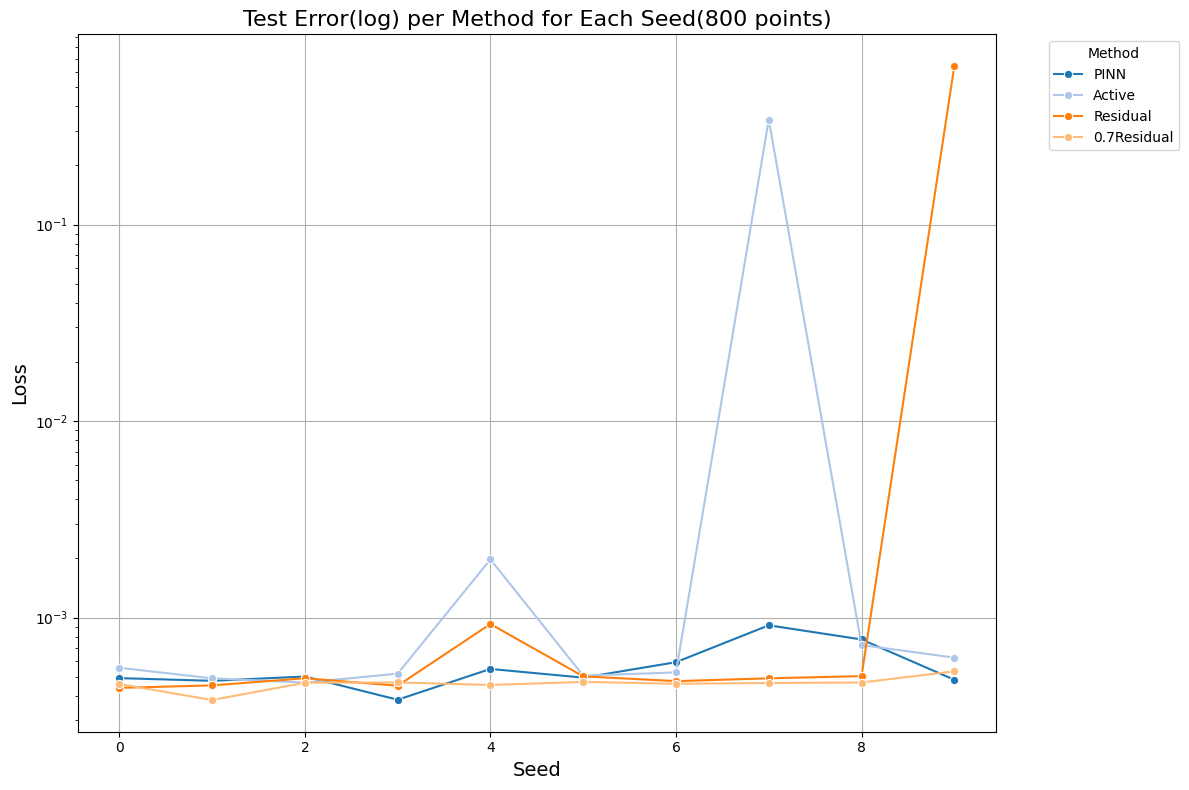

In [4]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')


# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签

plt.title('Test Error(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

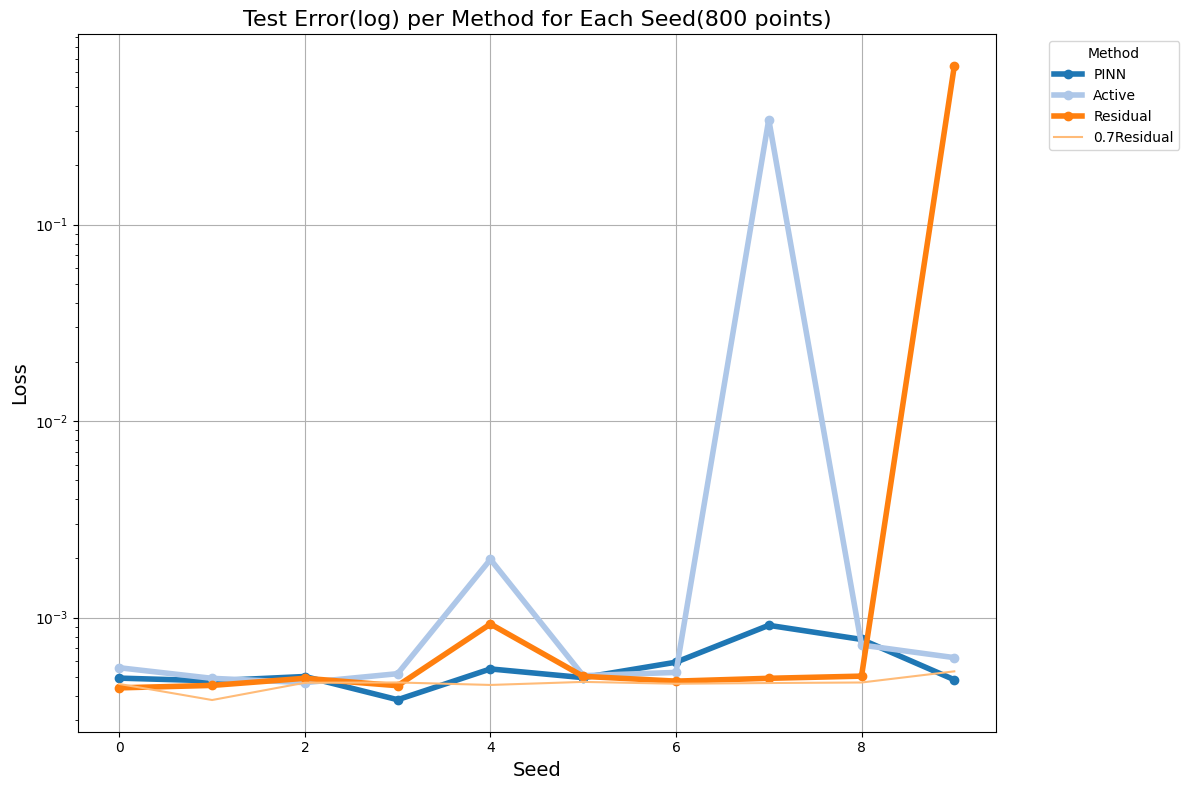

In [5]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )

# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('Test Error(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_40244\772891821.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_40244\772891821.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


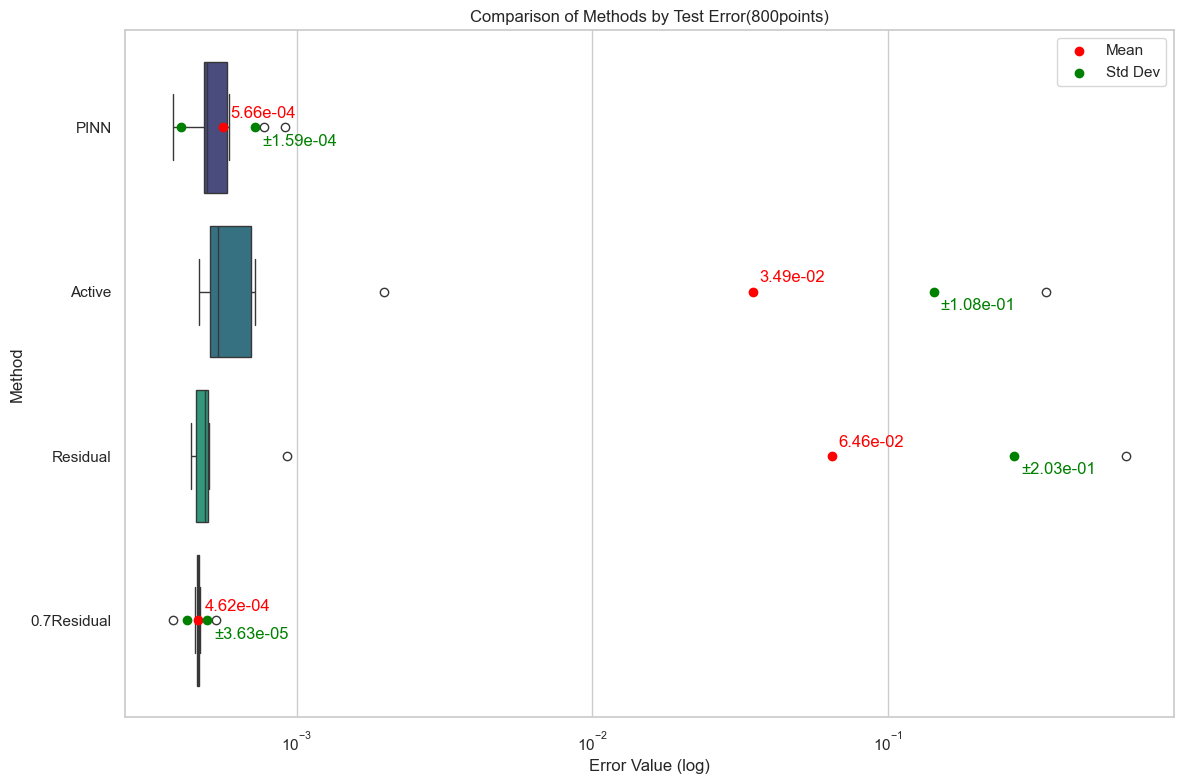

In [6]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.2e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.2e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by Test Error(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

In [7]:
(7.01e-04-4.61e-04)/7.01e-04

0.3423680456490728

C:\Users\cheny\AppData\Local\Temp\ipykernel_40244\2907399335.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_df = dd.groupby('Method')['Values'].std().reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_40244\2907399335.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


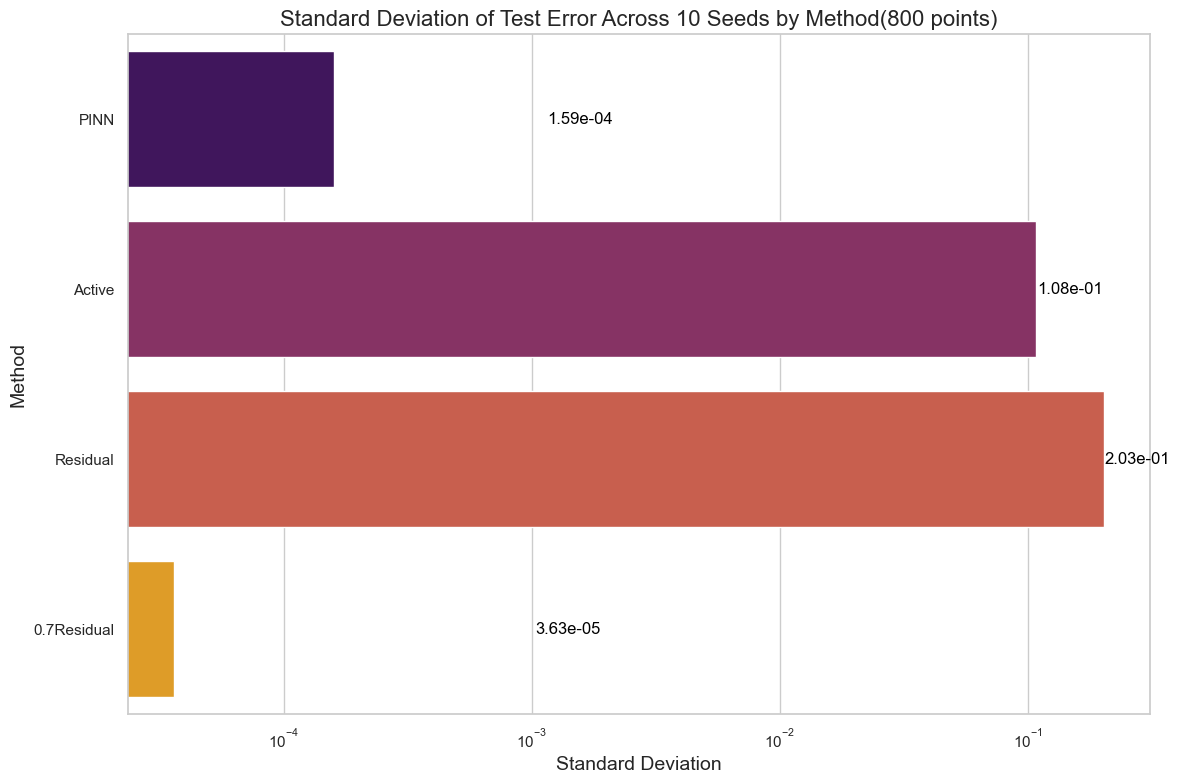

In [8]:
# 计算每种方法在10个seed下的标准差
std_df = dd.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(12, 8))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)

plt.xscale('log')

# 添加标题和轴标签
plt.title('Standard Deviation of Test Error Across 10 Seeds by Method(800 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()
# 显示图像
plt.show()

In [9]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "MAE"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['PINN', 'Active', 'Residual', '0.7Residual']
Seeds: range(0, 10)
Loss Values: {'PINN': [0.00015397783070231113, 0.0001454873810307916, 0.0001548726465310479, 0.00012626243115483474, 0.00019635635649588497, 0.00015449652540876614, 0.0001842174007906868, 0.0002456482515296615, 0.0002340281849460364, 0.00014943499300139977], 'Active': [0.00018516130868928007, 0.00015239831731062625, 0.00014283152582780407, 0.00016390754795242608, 0.0005215132734166209, 0.00016036564347222663, 0.00017179250399467942, 0.07688654768698683, 0.00025618642599234404, 0.0002191694478042031], 'Residual': [0.00013466048655549618, 0.00013774013160500353, 0.00014855616332055393, 0.00013839193712877486, 0.00028004969048753275, 0.0001510724688482137, 0.0001452714425514351, 0.00014857218467576657, 0.0001520704178371895, 0.1582632412863403], '0.7Residual': [0.00014025014785666178, 0.00012330366198635658, 0.0001406931332183354, 0.00014315082258136954, 0.00013857859174272303, 0.0001420651370555427, 0.000141002467

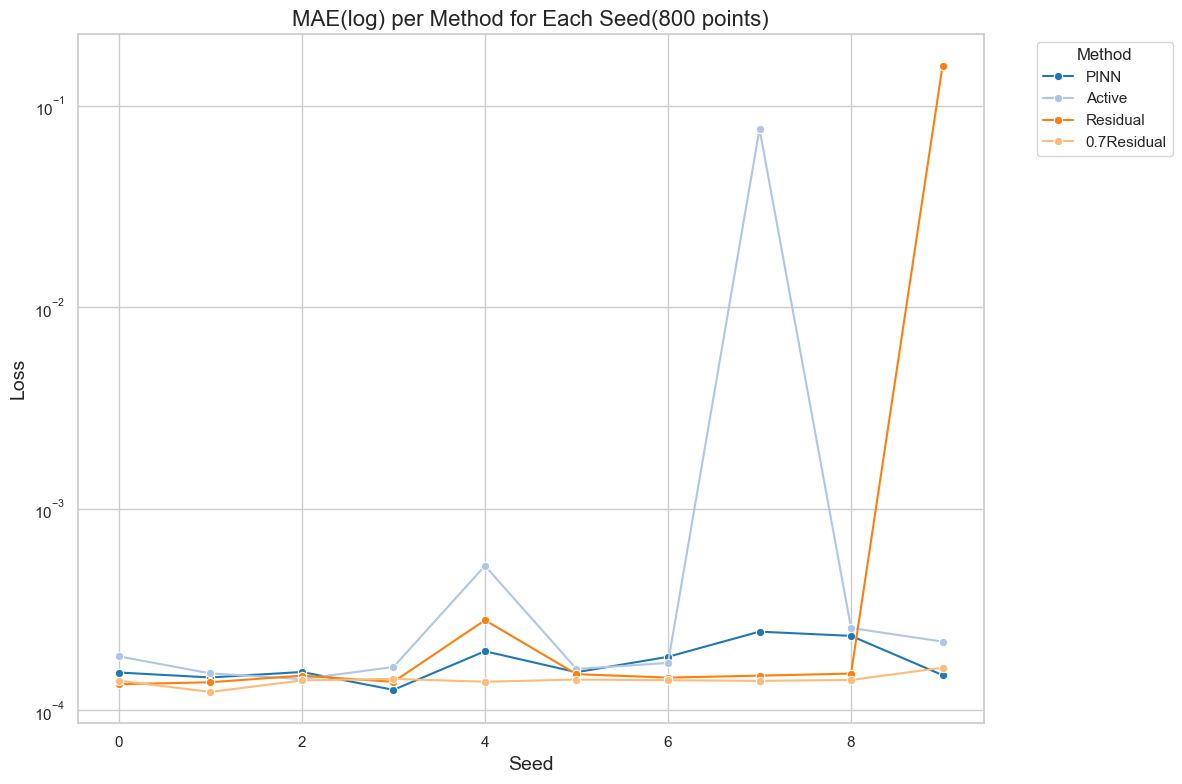

In [10]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)



# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')

# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签
plt.title('MAE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

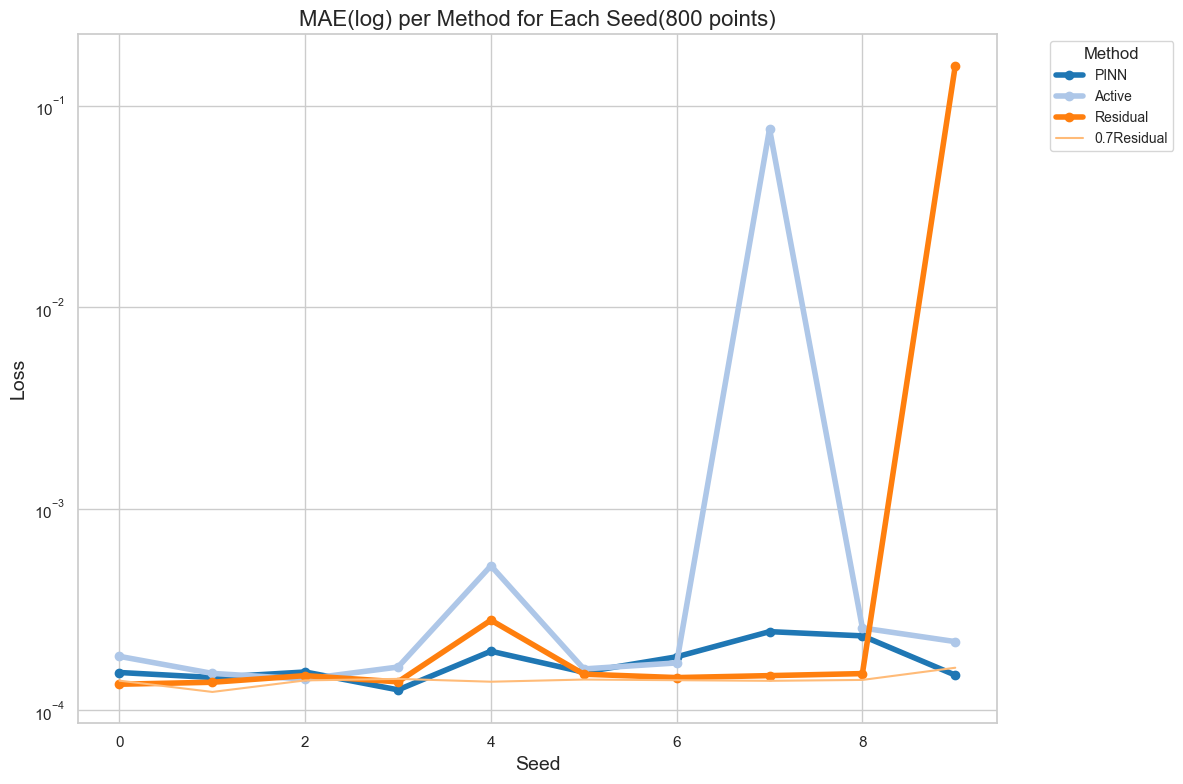

In [11]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )


# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('MAE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_40244\2169414111.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_40244\2169414111.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


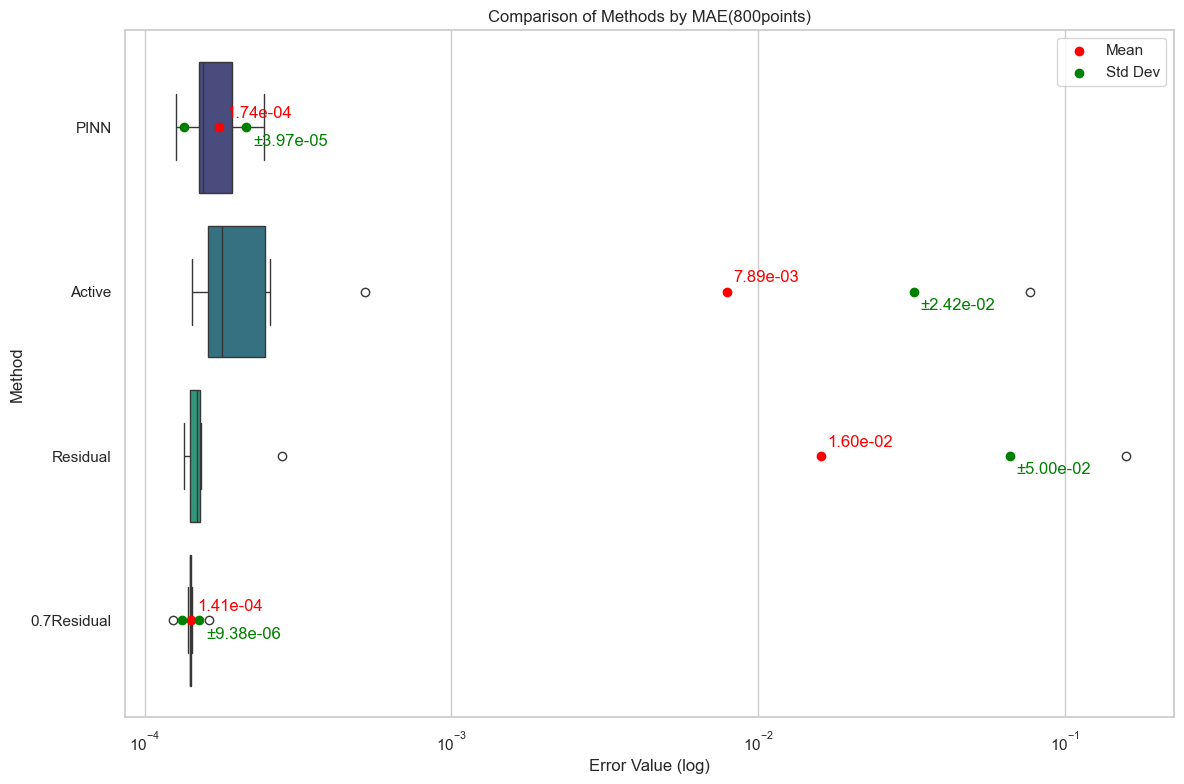

In [12]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.2e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.2e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by MAE(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_40244\2556958130.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_df = dd.groupby('Method')['Values'].std().reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_40244\2556958130.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


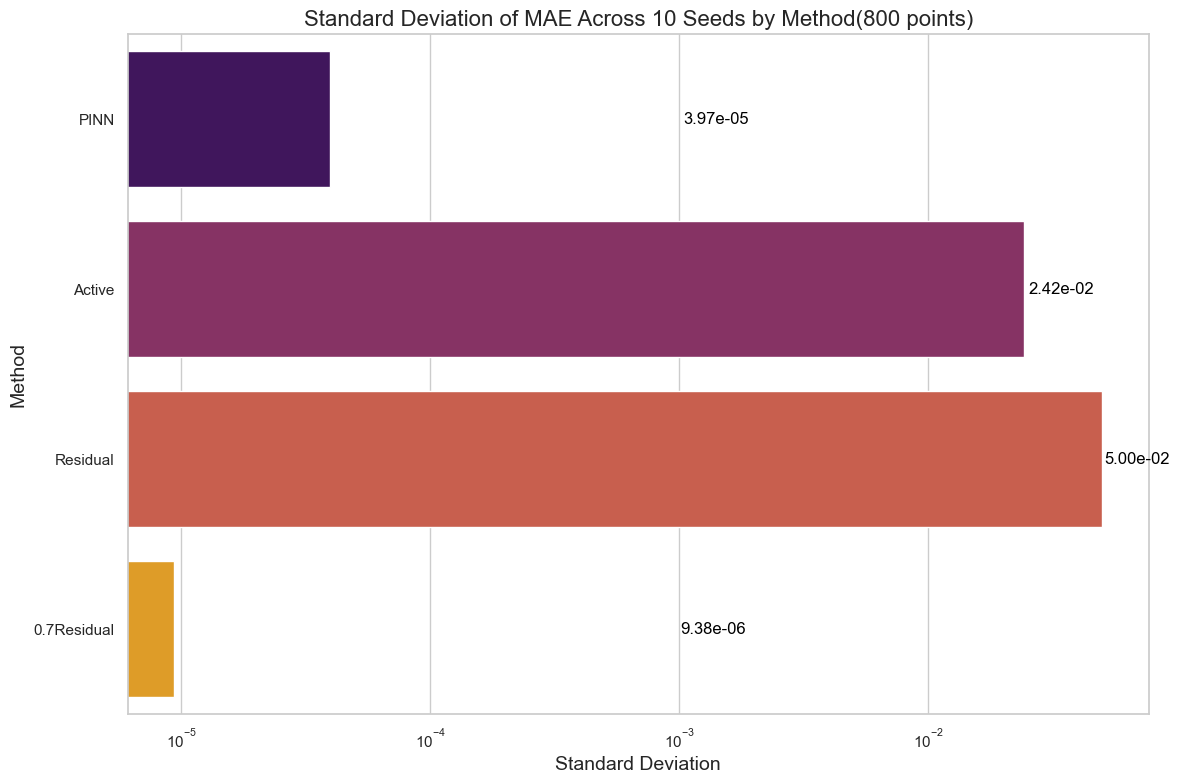

In [13]:
# 计算每种方法在10个seed下的标准差
std_df = dd.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(12, 8))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)

plt.xscale('log')

# 添加标题和轴标签
plt.title('Standard Deviation of MAE Across 10 Seeds by Method(800 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()
# 显示图像
plt.show()

In [14]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "MSE"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['PINN', 'Active', 'Residual', '0.7Residual']
Seeds: range(0, 10)
Loss Values: {'PINN': [5.02034790357667e-08, 4.692699759238895e-08, 5.196422300360493e-08, 3.6634415860281316e-08, 8.172389465962264e-08, 5.070185177060105e-08, 7.304977403304386e-08, 1.6983871256676875e-07, 1.2104198107510296e-07, 4.820312678060034e-08], 'Active': [6.588629203382683e-08, 4.983859216945594e-08, 4.544956632807816e-08, 5.5827687329648876e-08, 7.772103421774413e-07, 5.354005337717293e-08, 5.871059239147882e-08, 0.02397774313168036, 1.2040161291692695e-07, 8.790442589443165e-08], 'Residual': [4.0661568759470776e-08, 4.259159818610274e-08, 5.0772769573972464e-08, 4.2571266351709874e-08, 1.7989833118891455e-07, 5.204902642176019e-08, 4.7284867983491434e-08, 4.937375046094986e-08, 5.234705484498265e-08, 0.08286103053311286], '0.7Residual': [4.423519388343329e-08, 3.28702686893946e-08, 4.540074511476649e-08, 4.558819972743756e-08, 4.2605986612842545e-08, 4.6204191755255835e-08, 4.4642112865802436e-08, 4

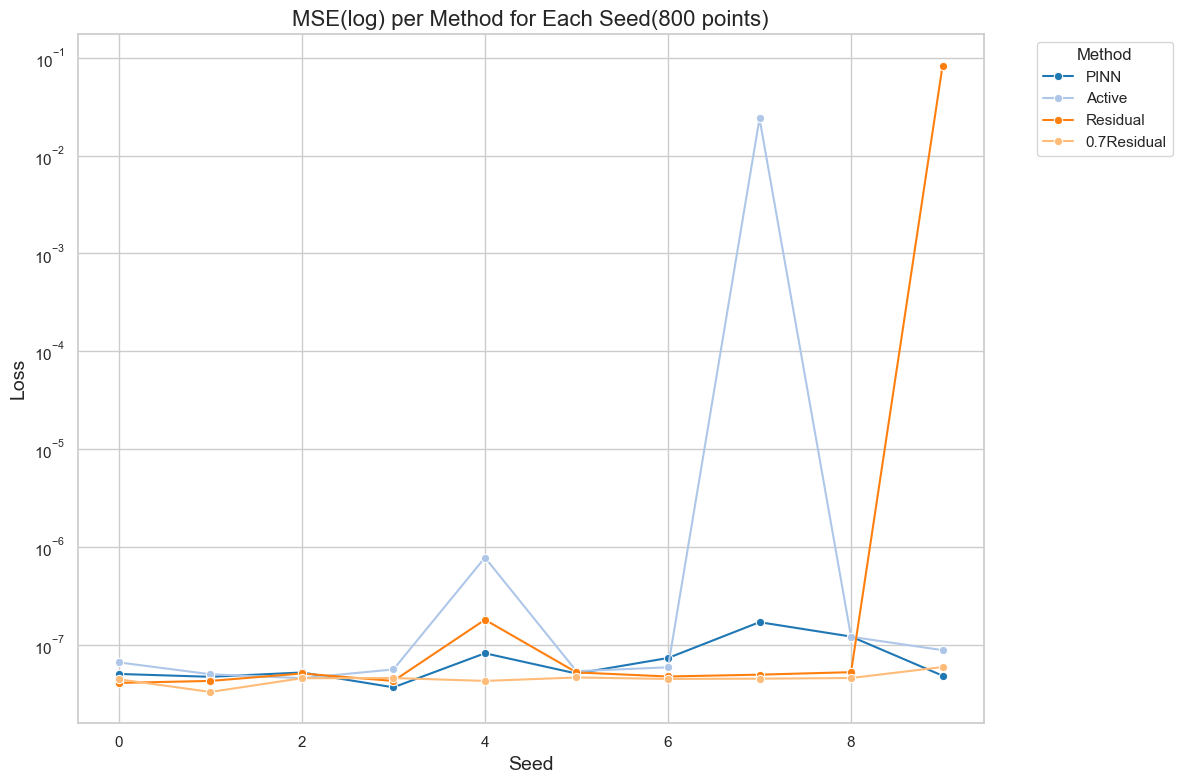

In [15]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')



# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签
plt.title('MSE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

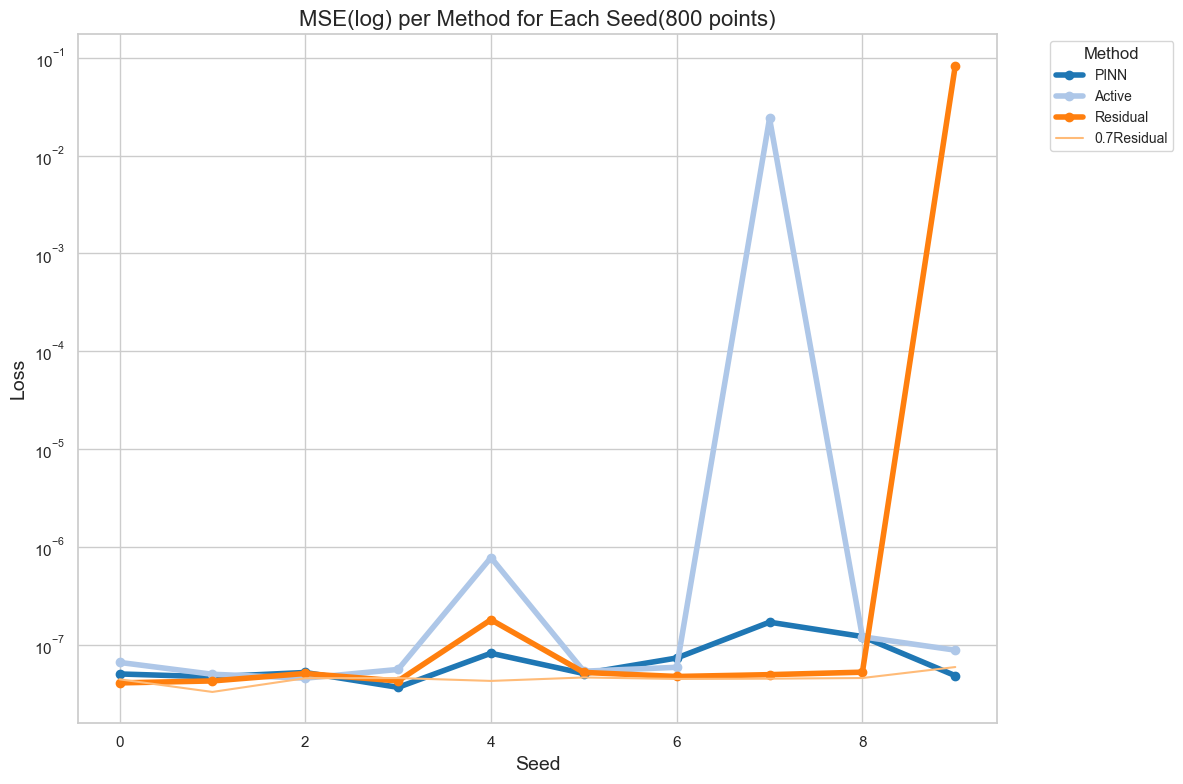

In [16]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )


# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('MSE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_40244\763428643.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_40244\763428643.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


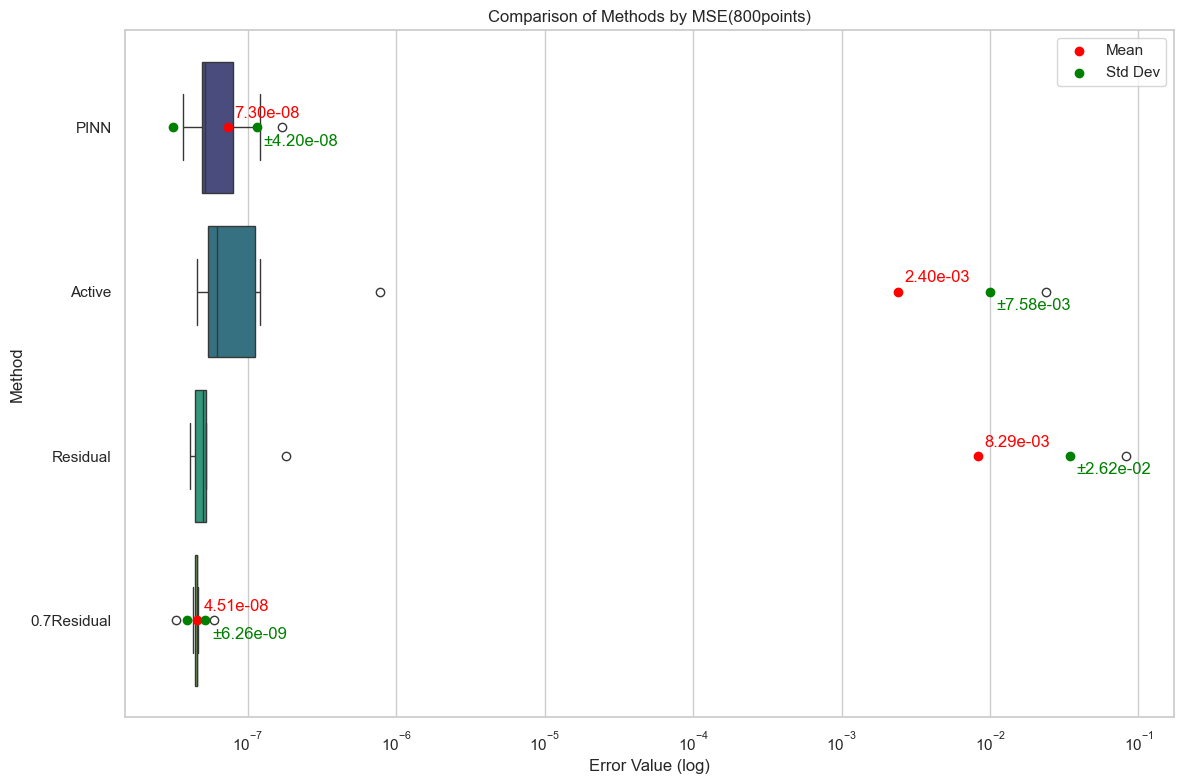

In [17]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.2e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.2e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by MSE(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()